In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [5]:
car = pd.read_csv('quikr_car.csv')

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [15]:
car.shape

(892, 6)

In [17]:
backup_car_data = car.copy()

## Quality
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values



## Cleaning Data :

In [31]:
car = car[car['year'].str.isnumeric()]

In [37]:
# year is in object. Change to integer
car['year']=car['year'].astype(int)

In [39]:
# Price has Ask for Price
car=car[car['Price']!='Ask For Price']

In [41]:
# Price has commas in its prices and is in object
car['Price']=car['Price'].str.replace(',','').astype(int)

In [45]:
# kms_driven has object values with kms at last.
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

# It has nan values and two rows have 'Petrol' in them
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)

In [49]:
# fuel_type has nan values
car=car[~car['fuel_type'].isna()]

In [51]:
car.shape


(816, 6)

In [54]:
# Company does not need any cleaning now.
# Changing car names. Keeping only the first three words
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [56]:
# Resetting the index of the final cleaned data
car=car.reset_index(drop=True)

In [58]:
car

name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
812          Tata Indica V2      Tata  2009  110000       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
814            Tata Zest XM      Tata  2018  260000       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]

In [60]:
car.to_csv('Cleaned_Car_data.csv')

In [62]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [71]:
import seaborn as sns

### Checking relationship of Company with Price

C:\Users\acer\AppData\Local\Temp\ipykernel_7304\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


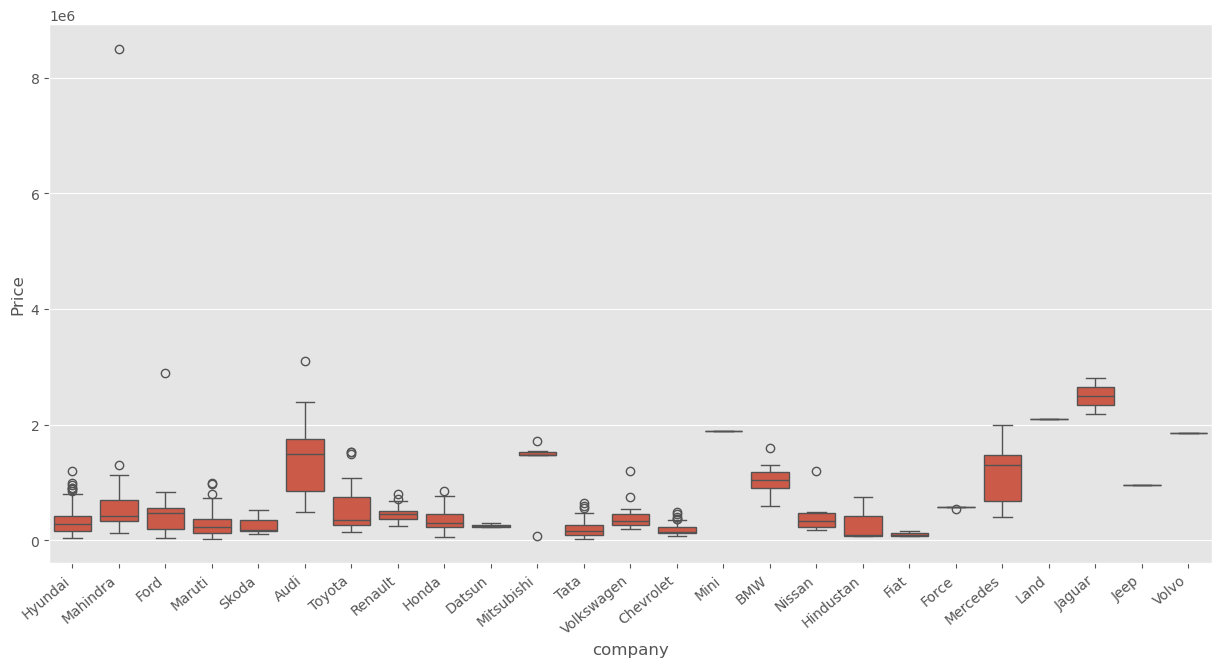

In [81]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cann

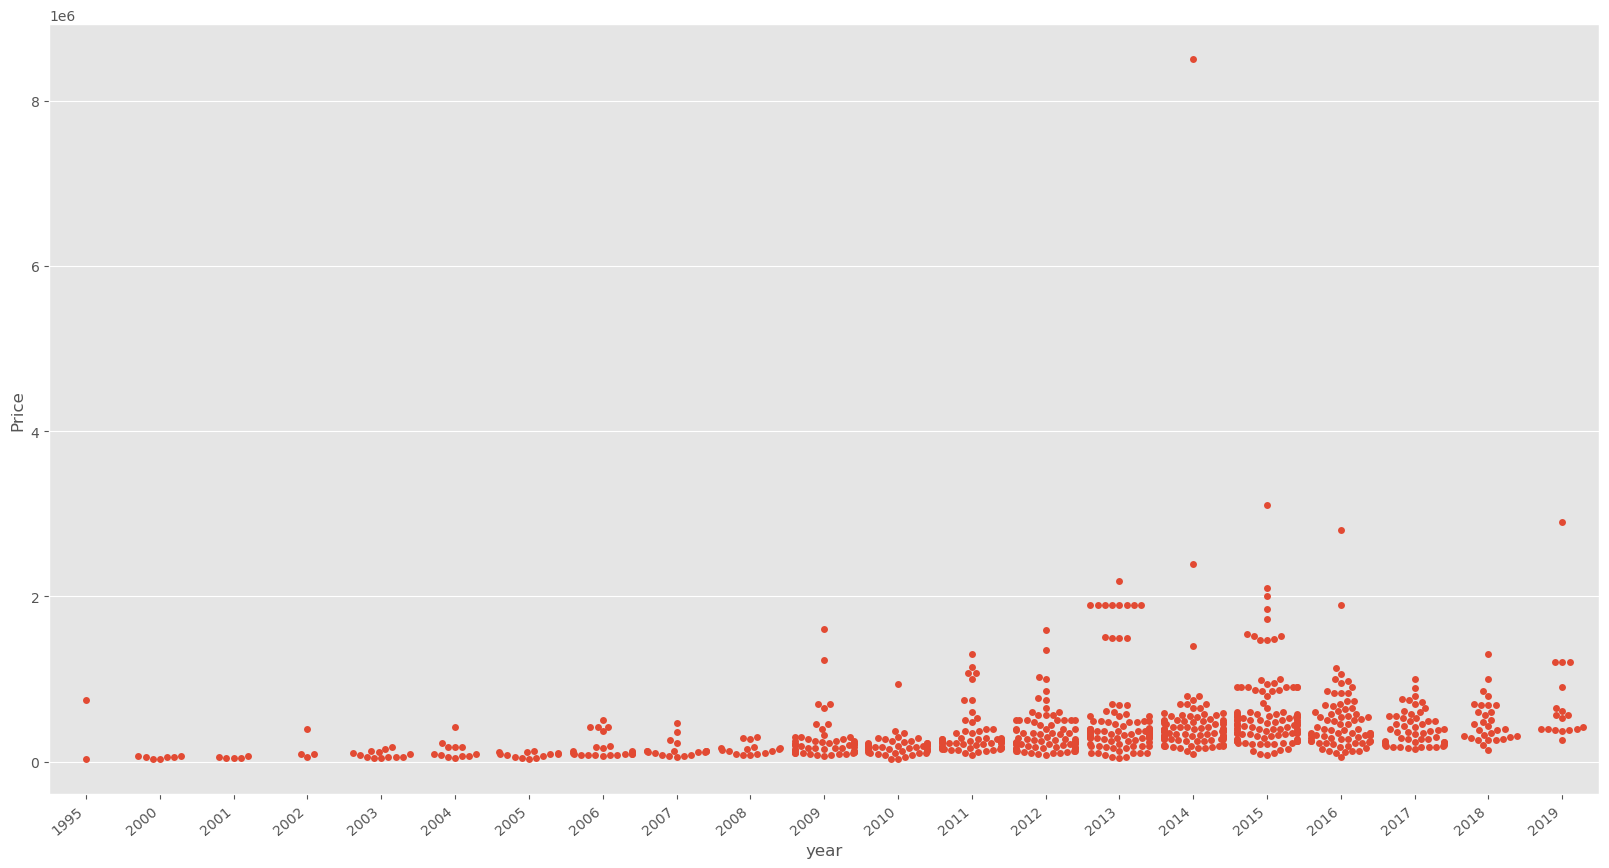

In [77]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

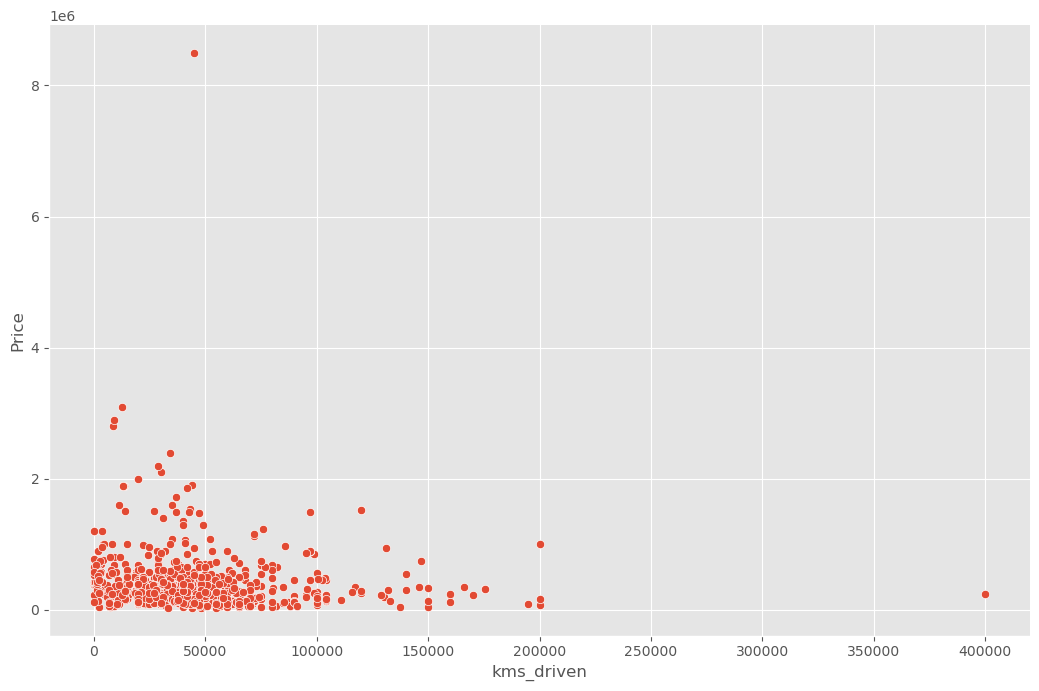

In [84]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

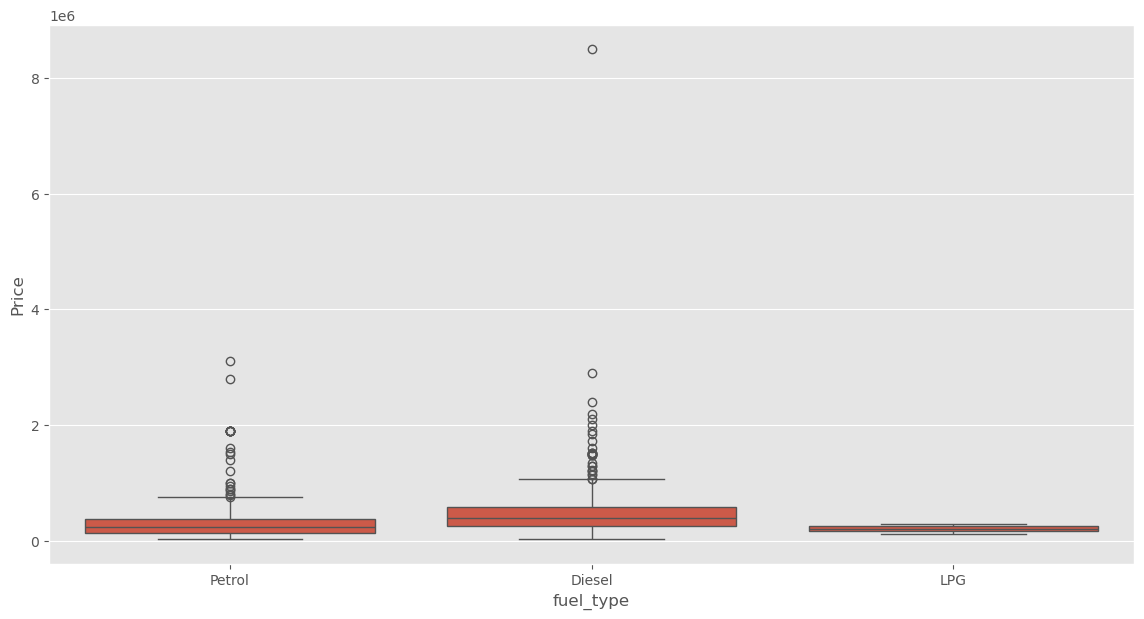

In [87]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

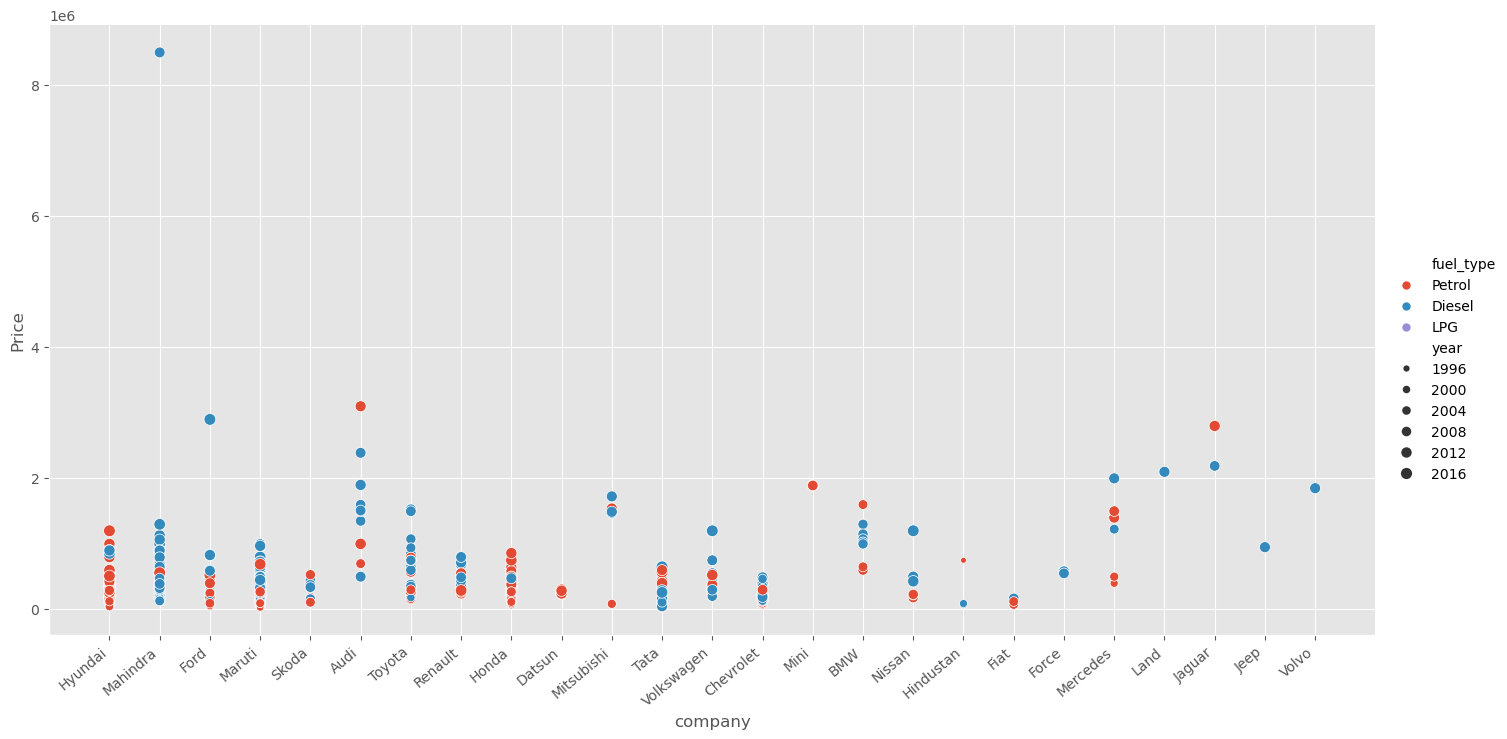

In [90]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

## Extracting Training Data :

In [94]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

### Applying Train Test Split

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [99]:
from sklearn.linear_model import LinearRegression

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [105]:
# Creating an OneHotEncoder object to contain all the possible categories
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [107]:
# Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [109]:
# Linear Regression 
lr = LinearRegression()

#### Making a pipeline

In [112]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [115]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [117]:
y_pred=pipe.predict(X_test)

In [119]:
r2_score(y_test,y_pred)

0.574770986621687

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.86 as r2_score

In [121]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [123]:
np.argmax(scores)

247

In [125]:
scores[np.argmax(scores)]

0.8604264250781322

In [128]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([453165.33580118])

In [132]:
#### The best model is found at a certain random state 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8604264250781322

In [136]:
import pickle

In [138]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [140]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([455161.92151754])

In [142]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese